# Training Models 

### Linear Regression 

In [1]:
import numpy as np

In [2]:
np.random.seed(42) # to make this code example reproducible
m = 100 # number of instances
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector

In [3]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [4]:
theta_best

array([[4.21509616],
       [2.77011339]])

The function that we used to generate the data is y = 4 + 3x + Gaussian noise

In [5]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

The smaller and noisier the dataset,
the harder it gets

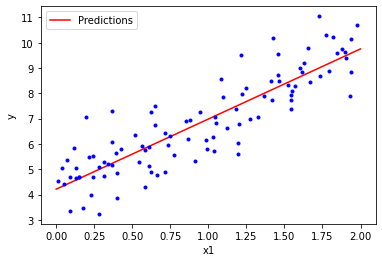

In [6]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.legend()
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

Performing Linear Regression using Scikit-Learn and this gives the same results as it can be seen below 

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [8]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

This function computes 𝛉ˆ = X+y, where X+ is the pseudoinverse of X (specifically, the Moore-Penrose
inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly

In [10]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

### Gradient Descent

In [11]:
eta = 0.1 # learning rate
n_epochs = 1000
m = len(X_b) # number of instances

In [12]:
np.random.seed(42)
theta = np.random.randn(2, 1) # randomly initialized model parameter

In [13]:
for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [14]:
theta

array([[4.21509616],
       [2.77011339]])

### Stochastic Gradient Descent

In [15]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [16]:
theta

array([[4.21076011],
       [2.74856079]])

#### Performing Linear Regression Using SGD

In [17]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

As i can be observed, the values are quite close to the normal eqn

### Polynomial Regression 

In [19]:
np.random.seed(42)
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1) 

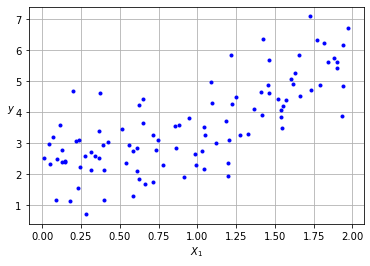

In [20]:
plt.plot(X, y, 'b.')
plt.xlabel('$X_1$')
plt.ylabel('$y$', rotation=0)
plt.grid()
plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s PolynomialFeatures
class to transform our training data, adding the square (second-degree polynomial) of each feature in the
training set as a new feature 

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.74908024])

In [22]:
X_poly[0]

array([0.74908024, 0.5611212 ])

X_poly now contains the original feature of X plus the square of this feature

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.56140272]), array([[-0.36112061,  1.0810637 ]]))

### Learning Curve 

Scikit-Learn has a useful learning_curve() function to help with this: it trains and evaluates the model
using cross-validation.

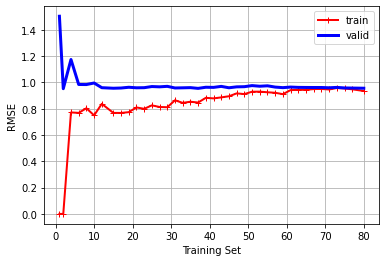

In [24]:
from sklearn.model_selection import learning_curve 
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend()
plt.xlabel("Training Set")
plt.ylabel("RMSE")
plt.grid()
plt.show()

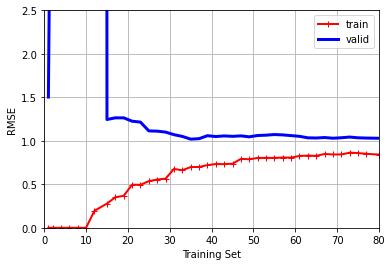

In [33]:
from sklearn.pipeline import make_pipeline
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend()
plt.xlabel("Training Set")
plt.ylabel("RMSE")
plt.axis([0, 80, 0, 2.5])
plt.grid()
plt.show()

## Regularized Linear Models
### Ridge Regression

Perfoming Ridge Regression with Scikit-learn using a closled-form solution

In [37]:
# noise data
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [38]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

using SGD:

In [47]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                      max_iter=1000, eta0=0.01, random_state=42)

sgd_reg.fit(X, y.ravel())  # expects 1D targets
sgd_reg.predict([[1.5]])

array([1.55302613])